In [1]:
import os
os.environ["HF_ENDPOINT"] = "https://hf-mirror.com"
device = "cuda:5"

In [2]:
import torch
from diffusers import SemanticStableDiffusionPipeline

pipe = SemanticStableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16
).to(device)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [3]:
out = pipe(
    prompt="a photo of the face of a woman",
    num_images_per_prompt=1,
    guidance_scale=7,
    editing_prompt=[
        "smiling, smile",  # Concepts to apply
        "glasses, wearing glasses",
        "curls, wavy hair, curly hair",
        "beard, full beard, mustache",
    ],
    reverse_editing_direction=[
        False,
        False,
        False,
        False,
    ],  # Direction of guidance i.e. increase all concepts
    edit_warmup_steps=[10, 10, 10, 10],  # Warmup period for each concept
    edit_guidance_scale=[4, 5, 5, 5.4],  # Guidance scale for each concept
    edit_threshold=[
        0.99,
        0.975,
        0.925,
        0.96,
    ],  # Threshold for each concept. Threshold equals the percentile of the latent space that will be discarded. I.e. threshold=0.99 uses 1% of the latent dimensions
    edit_momentum_scale=0.3,  # Momentum scale that will be added to the latent guidance
    edit_mom_beta=0.6,  # Momentum beta
    edit_weights=[
        1,
        1,
        1,
        1,
        1,
    ],  # Weights of the individual concepts against each other
)
image = out.images[0]

  0%|          | 0/51 [00:00<?, ?it/s]

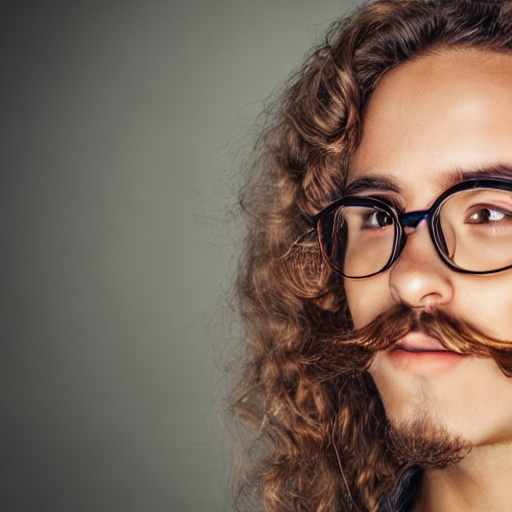

In [4]:
image